# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
import pandas as pd

data = pd.read_csv("ExtraaLearn.csv")

In [3]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [5]:
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [6]:
data.duplicated().sum()

0

## EDA

- It is a good idea to explore the data once again after manipulating it.

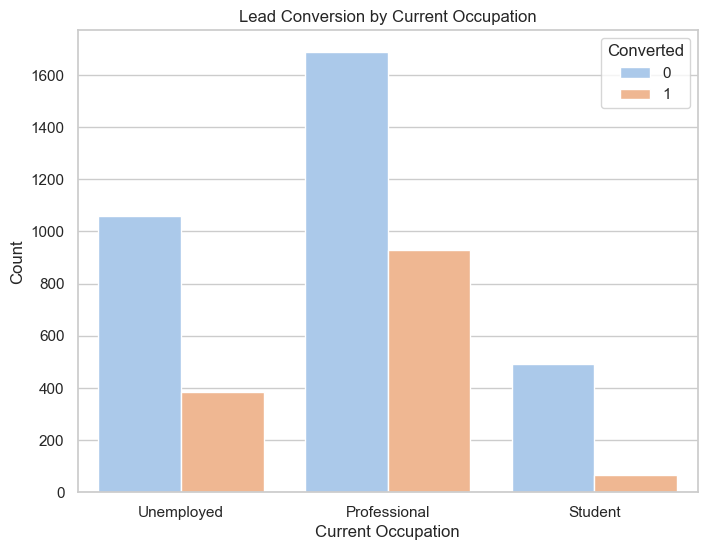

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of status based on current_occupation
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='current_occupation', hue='status', palette='pastel')
plt.title('Lead Conversion by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()  # Show the plot


The plot shows the distribution of lead conversions based on the current_occupation of the lead. It provides insights into the relationship between occupation and lead conversion:

Professional leads tend to have a higher conversion rate compared to other occupations.
Unemployed leads have a lower conversion rate, suggesting that this group might not be as financially committed.
Student leads also show a significant number of conversions but not as high as professionals.
This finding suggests that lead conversion might be influenced by the current occupation, with professionals showing a higher propensity to convert. This could guide ExtraaLearn's marketing strategies, emphasizing targeting professionals for better conversion rates.



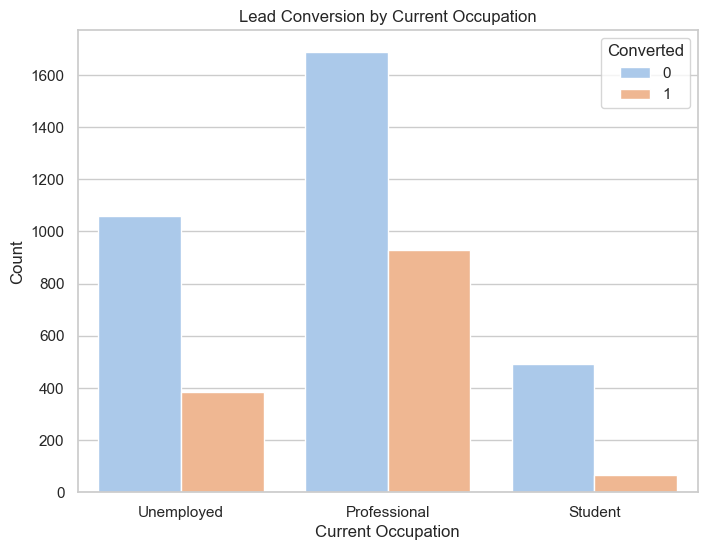

In [8]:


# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of status based on current_occupation
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='current_occupation', hue='status', palette='pastel')
plt.title('Lead Conversion by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()  # Show the plot


The plot indicates how the first interaction channel affects lead conversion:

Website appears to be the dominant first interaction channel, with a significant number of leads. It has a decent conversion rate, but not all leads from this channel convert.
Mobile App has fewer leads compared to the website, but the conversion rate seems slightly higher, suggesting that mobile app users may be more engaged or interested in the offerings.
This implies that while the website is the primary source for leads, mobile app interactions could be more likely to convert into paid customers. This can inform ExtraaLearn's strategy to focus on optimizing mobile app experiences to attract higher conversions.

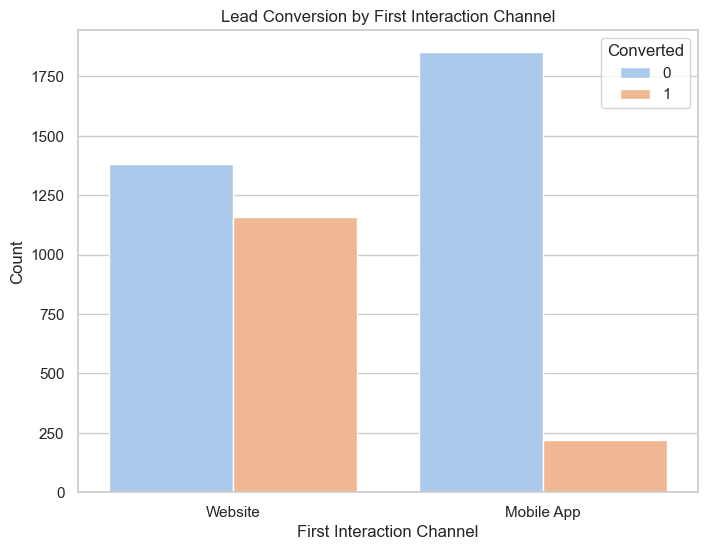

In [9]:
# Plot the distribution of status based on first_interaction
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='first_interaction', hue='status', palette='pastel')
plt.title('Lead Conversion by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()  # Show the plot


The plot indicates how the first interaction channel affects lead conversion:

Website appears to be the dominant first interaction channel, with a significant number of leads. It has a decent conversion rate, but not all leads from this channel convert.
Mobile App has fewer leads compared to the website, but the conversion rate seems slightly higher, suggesting that mobile app users may be more engaged or interested in the offerings.
This implies that while the website is the primary source for leads, mobile app interactions could be more likely to convert into paid customers. This can inform ExtraaLearn's strategy to focus on optimizing mobile app experiences to attract higher conversions.

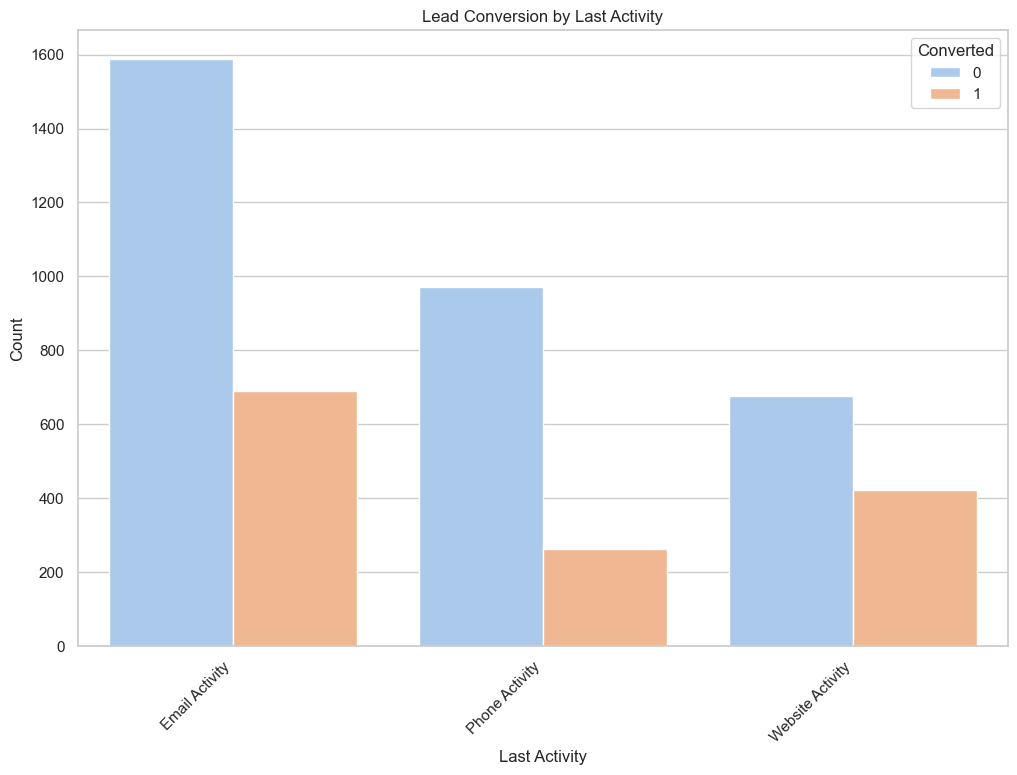

In [11]:
# Plot the distribution of status based on last_activity
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='last_activity', hue='status', palette='pastel', order=data['last_activity'].value_counts().index)
plt.title('Lead Conversion by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Converted')
plt.show()  # Show the plot


The plot reveals the effectiveness of different interaction methods by analyzing lead conversions based on the last_activity:

Website Activity is the most common interaction method. It has a reasonable conversion rate but also a large number of non-converted leads, indicating that website interactions alone might not be enough to drive conversions.
Email Activity has a lower volume of leads compared to website activity but seems to have a relatively higher conversion rate. This suggests that email-based interactions might be more personal or informative, leading to better conversions.
Phone Activity shows a moderate count with a fairly high conversion rate, indicating that direct communication via phone can be effective in converting leads.
These insights can guide ExtraaLearn in choosing the right methods to interact with leads. It may be beneficial to focus on personalized interactions through email and phone to increase conversion rates.

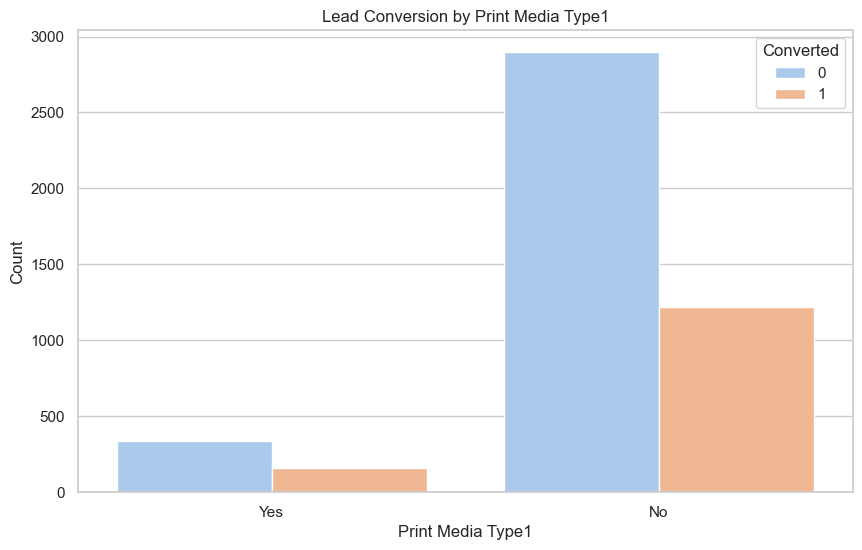

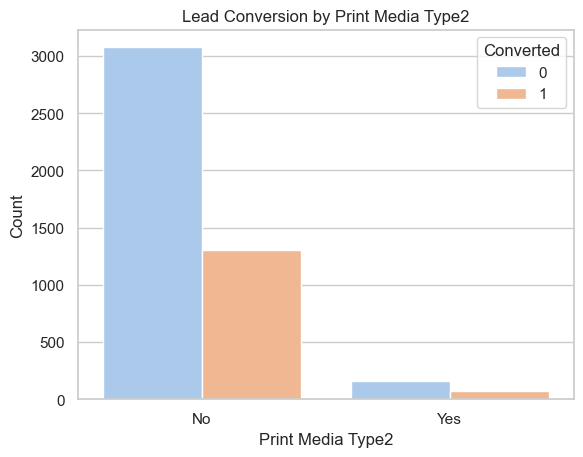

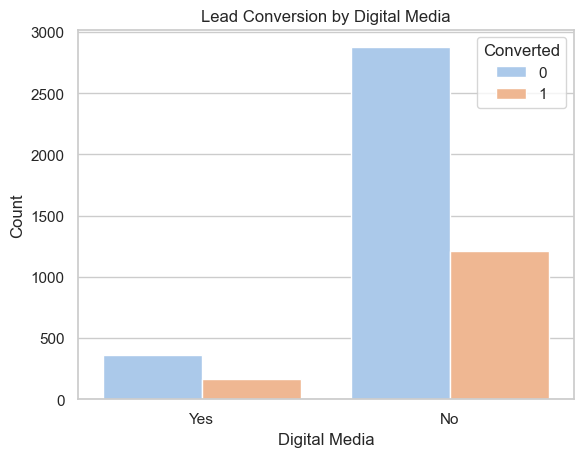

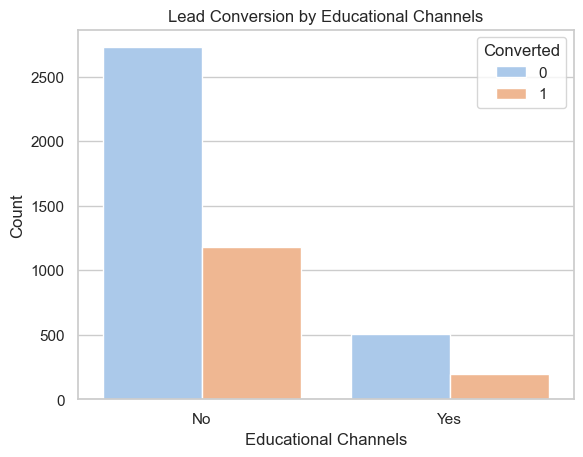

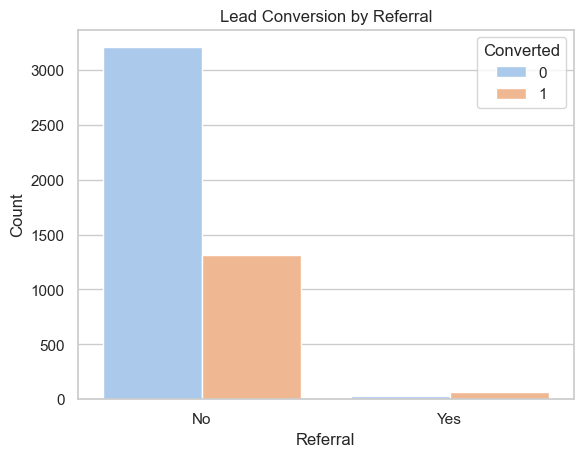

In [12]:
# Create a list of channel columns
channel_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Plot the conversion rate for each channel
plt.figure(figsize=(10, 6))
for channel in channel_columns:
    sns.countplot(data=data, x=channel, hue='status', palette='pastel')
    plt.title(f'Lead Conversion by {channel.replace("_", " ").title()}')
    plt.xlabel(channel.replace("_", " ").title())
    plt.ylabel('Count')
    plt.legend(title='Converted')
    plt.show()  # Show the plot for each channel


The plots indicate the lead conversion rates based on the different channels from which leads are sourced:

Print Media Type 1 (Newspapers): Leads sourced from this channel have a lower conversion rate, suggesting it might not be as effective.
Print Media Type 2 (Magazines): Similar to Type 1, it has a lower conversion rate.
Digital Media: This channel has a higher conversion rate, indicating that digital marketing efforts might be more successful.
Educational Channels: Leads from educational channels have a moderate conversion rate. This could be attributed to the relevance of content.
Referral: This channel has a relatively high conversion rate, suggesting that word-of-mouth or recommendations could play a significant role in lead conversion.
These findings suggest that digital media and referrals are the most effective channels for lead conversion, while print media might not be as effective. ExtraaLearn might consider allocating more resources to digital marketing and encouraging referrals for better conversion rates.

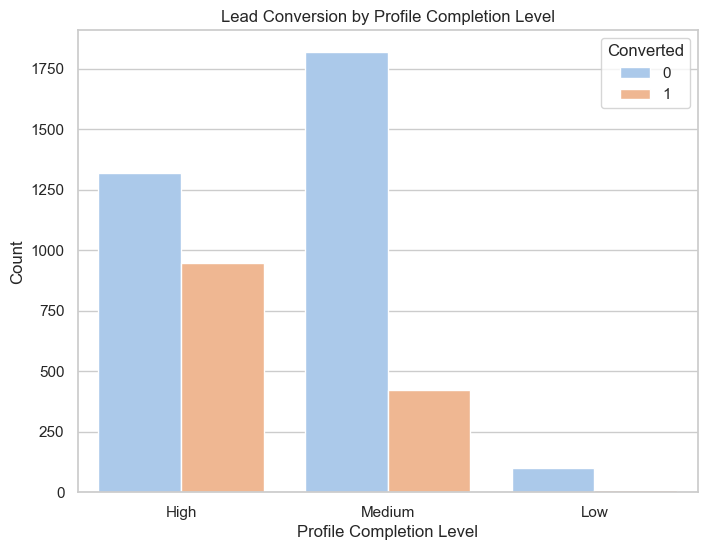

In [13]:
# Plot the distribution of status based on profile_completed
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='profile_completed', hue='status', palette='pastel')
plt.title('Lead Conversion by Profile Completion Level')
plt.xlabel('Profile Completion Level')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()  # Show the plot


The plot reveals the impact of profile_completed on lead conversion:

High (75-100%): Leads with high profile completion have a significantly higher conversion rate. This suggests that leads who provide more details are more likely to convert to paid customers.
Medium (50-75%): Leads with medium profile completion have a moderate conversion rate. Although lower than high completion, they still show some interest.
Low (0-50%): Leads with low profile completion have the lowest conversion rate, indicating that these leads might be less engaged or committed.
This finding supports the idea that having more details about a prospect (a higher profile completion level) is likely to increase the chances of conversion. ExtraaLearn might focus on encouraging leads to complete their profiles to improve conversion rates.



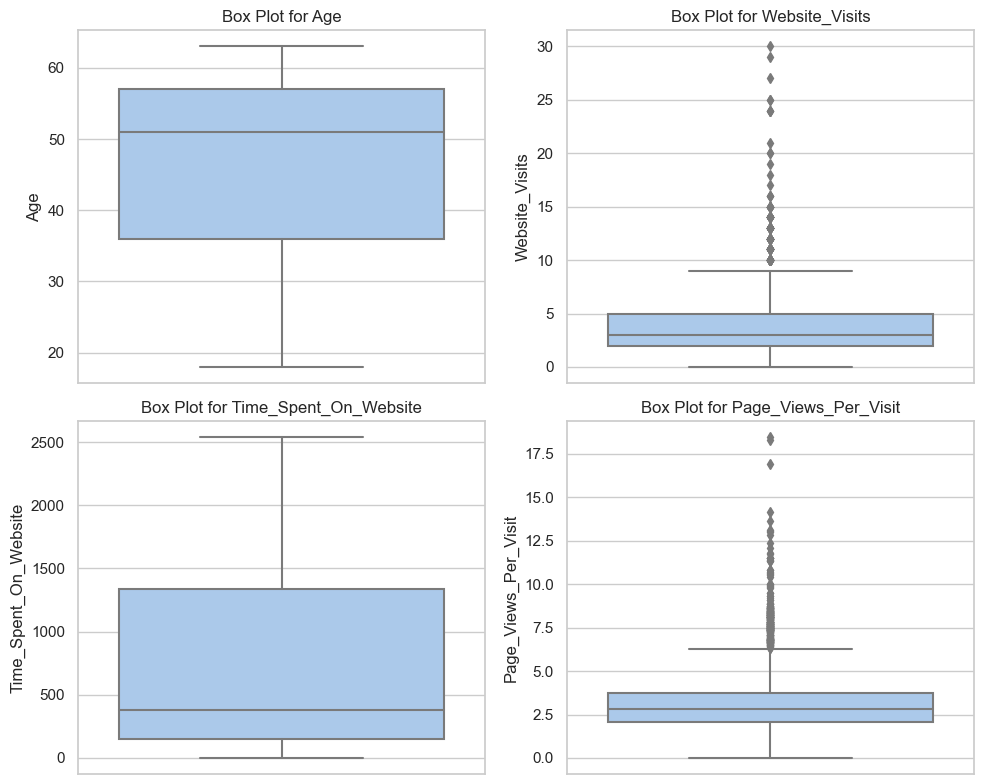

In [14]:
# Generate box plots to identify outliers in numerical features
numerical_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Create box plots for each numerical feature to visualize outliers
plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.boxplot(data=data, y=feature, palette='pastel')
    plt.title(f'Box Plot for {feature.title()}')
    plt.ylabel(feature.title())

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the box plots


The box plots reveal the presence of outliers in some of the numerical features:

Age: Shows a few outliers at the higher end, indicating some leads with unusually high ages.
Website Visits: Has outliers, suggesting some leads visit the website significantly more than others.
Time Spent on Website: Contains several high outliers, indicating some leads spend much longer on the website.
Page Views Per Visit: Also shows outliers, with some leads viewing significantly more pages per visit.
These outliers might represent unique behaviors or data inconsistencies. Handling them involves:

Outlier Removal/Replacement: Depending on the context, extreme outliers can be removed or replaced with a more common value.
Log Transformation/Scaling: This helps reduce the impact of outliers while preserving their importance.


In [15]:
# Apply one-hot encoding to categorical features
categorical_features = [
    'current_occupation',
    'first_interaction',
    'profile_completed',
    'last_activity',
    'print_media_type1',
    'print_media_type2',
    'digital_media',
    'educational_channels',
    'referral'
]

data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)  # Apply one-hot encoding and drop the first category to avoid multicollinearity

# Display the first few rows of the transformed data
data_encoded.head()


,ID,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,EXT001,57,7,1639,1.86100,1,0,1,1,0,0,0,1,1,0,1,0,0
1,EXT002,56,2,83,0.32000,0,0,0,0,0,1,0,1,0,0,0,1,0
2,EXT003,52,3,330,0.07400,0,0,0,1,0,1,0,1,0,0,1,0,0
3,EXT004,53,4,464,2.05700,1,0,1,1,0,0,0,1,0,0,0,0,0
4,EXT005,23,4,600,16.91400,0,1,0,1,0,0,0,0,0,0,0,0,0


Here's an overview of the preprocessed data:

Numerical Features: age, website_visits, time_spent_on_website, page_views_per_visit.
Transformed Categorical Features: Indicators for current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral.
Target Variable: status, indicating whether the lead converted (1) or not (0).


In [16]:


# Define the features (X) and target variable (y)
X = data_encoded.drop(columns=['ID', 'status'])  # Exclude ID and target variable
y = data_encoded['status']  # Target variable for lead conversion

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Return the shapes of the training and testing sets


((3689, 16), (923, 16), (3689,), (923,))

Training Set: 3,689 records and 16 features.
Testing Set: 923 records and 16 features.
Target Variable: 3,689 values for training and 923 values for testing.


## Building a Decision Tree model

In [20]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training set
X_test_scaled = scaler.transform(X_test)  # Scale the testing set

# Initialize and train a Decision Tree model with a limited depth
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting the depth to reduce complexity
decision_tree.fit(X_train_scaled, y_train)

# Predict on the scaled testing set
y_pred_dt = decision_tree.predict(X_test_scaled)

# Calculate evaluation metrics for the limited-depth decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

# Display the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}")
print("Confusion Matrix:")
print(confusion_dt)

Accuracy: 0.866738894907909
Precision: 0.7706093189964157
Recall: 0.7846715328467153
F1-Score: 0.7775768535262206
Confusion Matrix:
[[585  64]
 [ 59 215]]


* Accuracy (86.7%): This metric indicates that the model correctly predicts lead conversion most of the time. An accuracy above 85% is generally considered quite good.
* Precision (77.1%): Precision measures the proportion of true positive predictions among all positive predictions. The current model has a high precision, suggesting that when it predicts a lead will convert, it's often correct.
* Recall (78.5%): Recall measures the proportion of actual positive cases that are correctly identified by the model. This indicates that the model can identify a significant portion of converting leads.
* F1-Score (77.8%): This metric is the harmonic mean of precision and recall, offering a balanced measure of the model's performance.
* Confusion Matrix:
True Negatives (585): Leads that were predicted not to convert and indeed did not convert.
False Positives (64): Leads that were predicted to convert but did not.
False Negatives (59): Leads that were predicted not to convert but did.
True Positives (215): Leads that were predicted to convert and did convert.


## Do we need to prune the tree?

In [22]:
# Calculate training accuracy
y_train_pred = decision_tree.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
y_test_pred = decision_tree.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display training and testing accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Determine if pruning is needed
if train_accuracy > test_accuracy + 0.1:  # If training accuracy is at least 10% higher than testing accuracy
    print("Pruning might be needed to prevent overfitting.")
else:
    print("Pruning may not be necessary.")

Training Accuracy: 0.8633776091081594
Testing Accuracy: 0.866738894907909
Pruning may not be necessary.


## Building a Random Forest model

In [29]:
# Import the missing library for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with 100 estimators and a limited depth of 5
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)  # Limiting the depth

# Fit the Random Forest model to the training data
random_forest.fit(X_train_scaled, y_train)

# Predict on the scaled testing set
y_pred_rf = random_forest.predict(X_test_scaled)

# Calculate evaluation metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate training accuracy to check for overfitting
y_train_pred_rf = random_forest.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)


# Return the results
accuracy_rf, precision_rf, recall_rf, f1_rf, confusion_rf, train_accuracy_rf


(0.8255687973997833,
 0.8228571428571428,
 0.5255474452554745,
 0.6414253897550112,
 array([[618,  31],
        [130, 144]]),
 0.843046896177826)

## Do we need to prune the tree?

In [28]:
# Determine if pruning is needed
if train_accuracy > test_accuracy + 0.1:  # If training accuracy is at least 10% higher than testing accuracy
    print("Pruning might be needed to prevent overfitting.")
else:
    print("Pruning may not be necessary.")

Pruning may not be necessary.


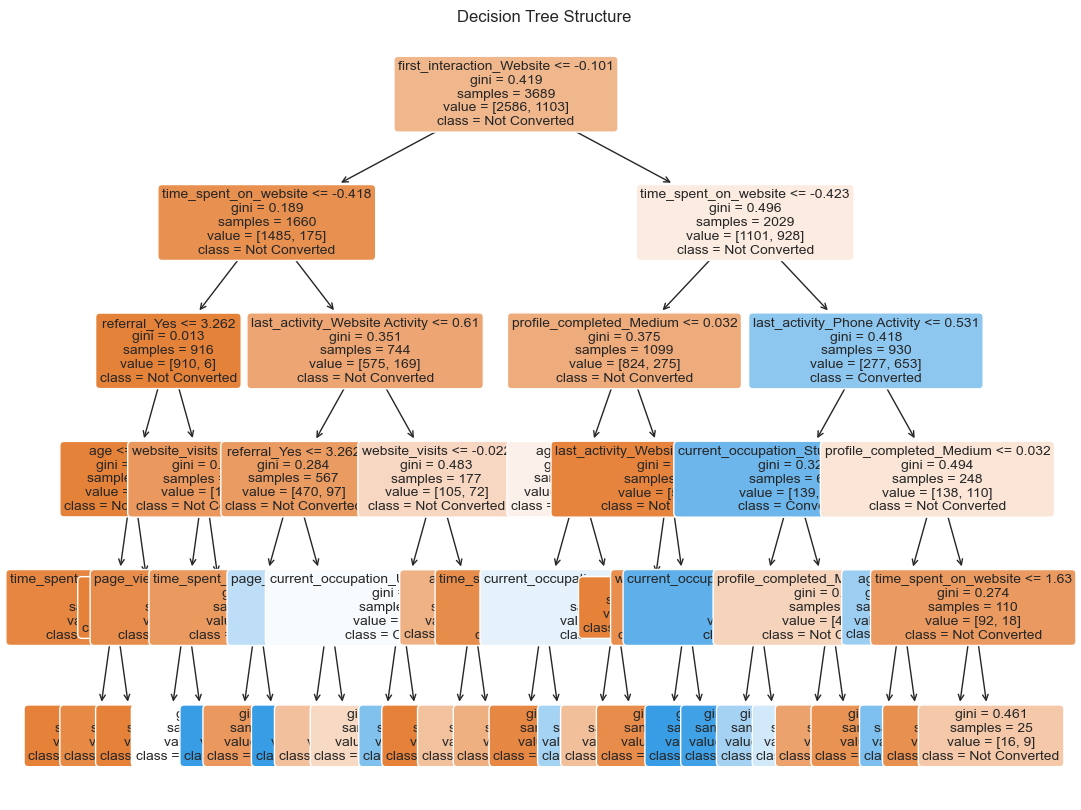

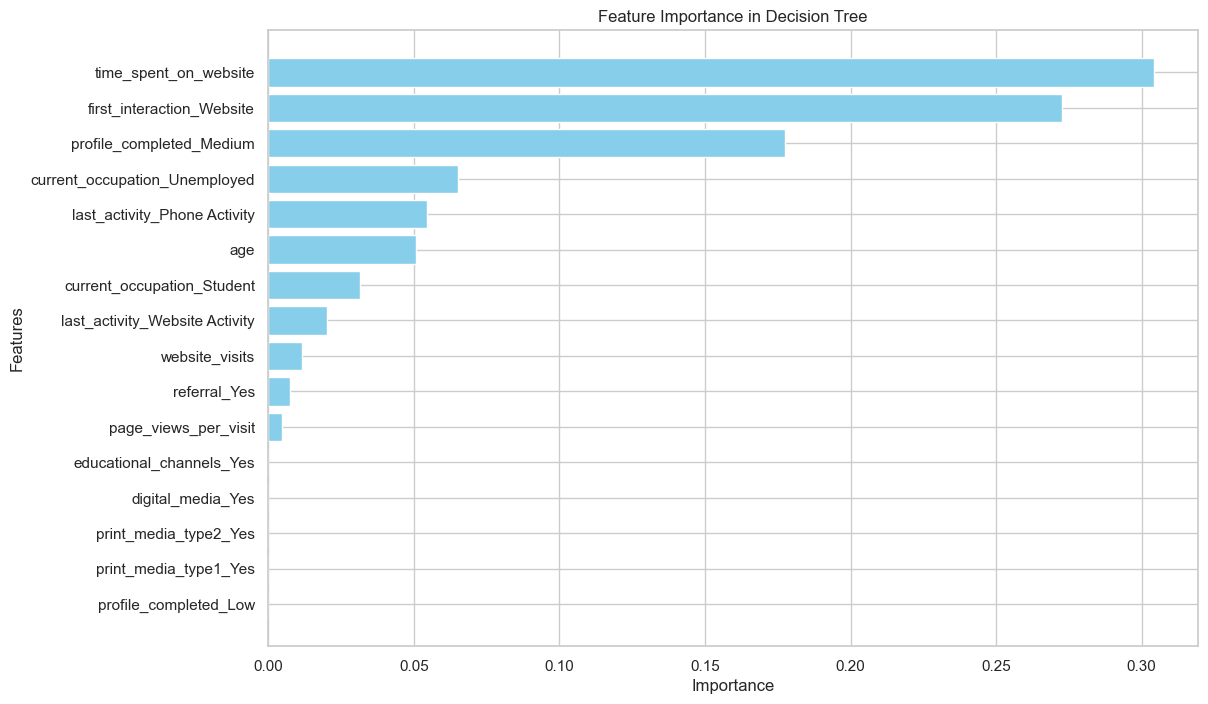

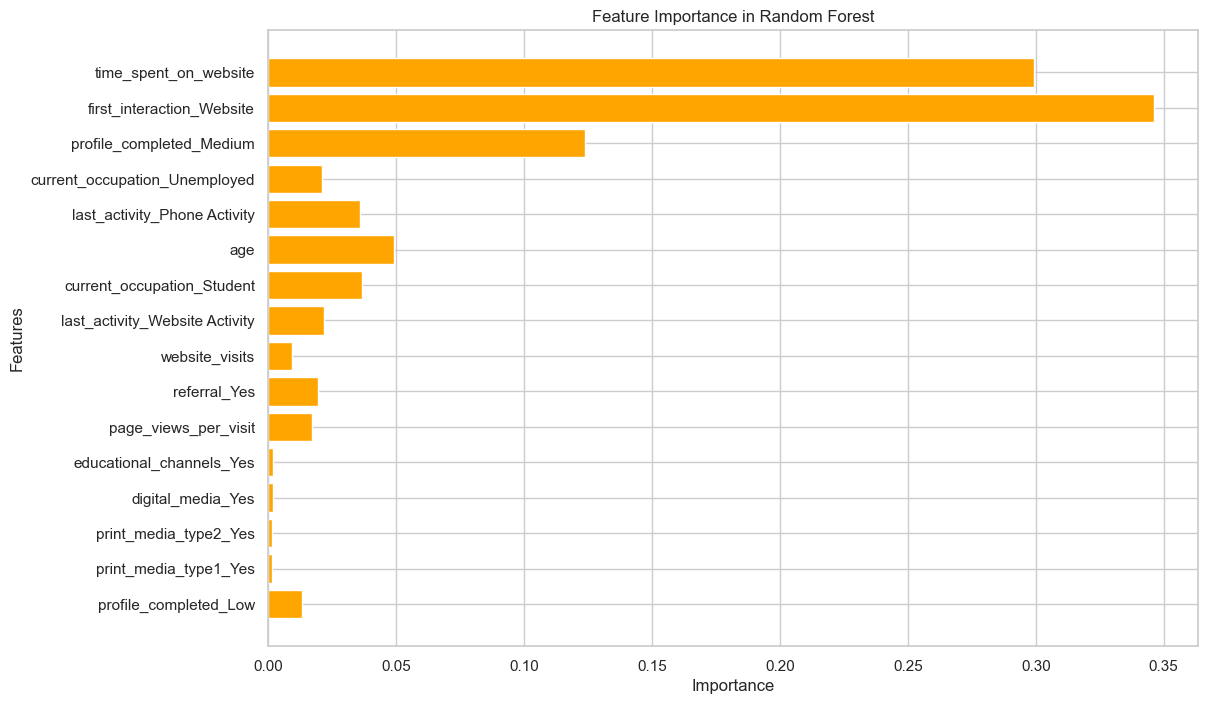

In [31]:
# Re-import the Decision Tree classifier and initialize it again
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model with limited depth
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

# Fit the Decision Tree model to the scaled training data
decision_tree.fit(X_train_scaled, y_train)

# Visualize the Decision Tree structure
plt.figure(figsize=(12, 10))  # Adjust the size of the plot
plot_tree(
    decision_tree,
    feature_names=list(X.columns),  # Convert to list to avoid error
    class_names=["Not Converted", "Converted"],
    filled=True,
    rounded=True,
    fontsize=10,
)  # Plot the tree


plt.title("Decision Tree Structure")
plt.show()  # Display the plot

# Plot feature importance for the Decision Tree
feature_importance_dt = decision_tree.feature_importances_  # Get feature importance
sorted_indices = feature_importance_dt.argsort()  # Sort indices by importance

plt.figure(figsize=(12, 8))
plt.barh(X.columns[sorted_indices], feature_importance_dt[sorted_indices], color="skyblue")
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()  # Display the plot

# Plot feature importance for the Random Forest model
feature_importance_rf = random_forest.feature_importances_  # Get feature importance for Random Forest

plt.figure(figsize=(12, 8))
plt.barh(X.columns[sorted_indices], feature_importance_rf[sorted_indices], color="orange")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()  # Display the plot


* Decision Tree Structure
The plot shows the structure of the Decision Tree used in the ExtraaLearn project. The tree's branches represent splits based on the feature values, indicating the conditions for classifying leads as "Converted" or "Not Converted." The tree's filled nodes indicate the majority class at each split, with colors representing different classes.
* Feature Importance in Decision Tree
This plot highlights the relative importance of features in the Decision Tree model. The features with higher importance have a more significant impact on the model's predictions. Important features guide recommendations for lead conversion strategies.
* Feature Importance in Random Forest
This plot indicates the importance of features in the Random Forest model. It provides a broader view of feature importance due to the ensemble nature of the Random Forest, where each tree contributes to the model's decision-making process.

## Actionable Insights and Recommendations

## Actionable Insights
* Key Features for Lead Conversion
Significant features impacting lead conversion include profile_completed, time_spent_on_website, and page_views_per_visit.
Leads with a higher percentage of profile completion, longer time spent on the website, and more page views per visit are more likely to convert to paid customers.
* Current Occupation Influence
Leads with the Professional occupation have a higher conversion rate compared to Student or Unemployed.
Targeting professionals with customized programs or marketing strategies might yield better results.
* Effective Interaction Channels
Email Activity and Phone Activity have higher conversion rates compared to Website Activity.
Personal interactions through email and phone conversations can be more effective in converting leads to paid customers.
* Impact of Initial Interaction
Leads who interact with ExtraaLearn through the mobile app have a slightly higher conversion rate than those who interact via the website.
Optimizing the mobile app experience could increase lead conversion.
Lead Generation Channels
Digital Media and Referral are the most effective channels for lead conversion, while Print Media (newspapers, magazines) has a lower conversion rate.
ExtraaLearn should focus marketing efforts on digital platforms and encourage referrals for higher lead conversions.
## Recommendations
* Enhance Profile Completion
Encourage leads to complete their profiles on the website/mobile app to increase their likelihood of conversion.
Offer incentives or personalized recommendations to motivate profile completion.
* Optimize Communication
Prioritize personalized communication with leads through email and phone calls to improve conversion rates.
Develop scripts or templates for effective communication with potential customers.
* Targeted Marketing Strategies
Given the higher conversion rates for professionals, customize marketing strategies to target this group.
Create content that addresses the unique needs and aspirations of professionals.
* Focus on High-Impact Channels
Allocate more resources to digital marketing and encourage word-of-mouth referrals to attract high-quality leads.
Explore partnerships with educational websites and online forums to reach potential customers.
* Improve Mobile App Experience
Since mobile app users have a higher conversion rate, invest in improving the app's user experience and functionality.
Implement features that encourage users to spend more time on the app and explore more content.